In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [6]:
fs=125e6/8
R=0.999
a1=0
a2=R*R
b0=1
b1=R-1
b2=-R
block_a = np.array([1,-a1,-a2])
block_b = np.array([b0, b1, b2])

In [13]:
def compute_complete_H(a_dc, b_dc, a, b):
    a_full = np.ones((5))
    a_full[1] = a_dc[1]+a[1]
    a_full[2] = a_dc[2] + a_dc[1]*a[1] + a[2]
    a_full[3] = a[1]*a_dc[2] + a[2]*a_dc[1]
    a_full[4] = a_dc[2]*a[2]

    b_full = np.ones((5))
    b_full[0] = b_dc[0]*b[0]
    b_full[1] = b_dc[1]*b[0]+b_dc[0]*b[1]
    b_full[2] = b_dc[2]*b[0] + b_dc[1]*b[1] + b_dc[0]*b[2]
    b_full[3] = b_dc[1]*b[2] + b_dc[2]*b[1]
    b_full[4] = b_dc[2]*b[2]
    return a_full, b_full
    

In [42]:
f_cz = 100e3
f_s = 125e6/8
Q=2
b_z, a_z = signal.iirnotch(f_cz, Q, f_s)

f_cxy = 30e3
f_s = 125e6/8
Q=3
b_xy, a_xy = signal.iirnotch(f_cxy, Q, f_s)


In [43]:
a_z, b_z

(array([ 1.        , -1.97849254,  0.98009326]),
 array([ 0.99004663, -1.97849254,  0.99004663]))

In [44]:
a_full_z, b_full = compute_complete_H(block_a, block_b, a_z, b_z)

/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_41585/1396237177.py:10: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(freq_z/1e3, 20*np.log10(abs(h_z)), color=colors[2])
/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_41585/1396237177.py:11: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(freq_xy/1e3, 20*np.log10(abs(h_xy)), color=colors[2], linestyle='dashed')


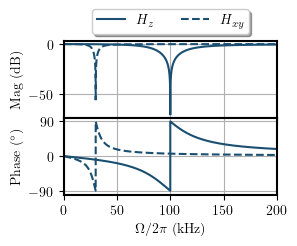

In [46]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']

freq_z, h_z = signal.freqz(b_z, a_z, fs=f_s, worN=int(1e6))
freq_xy, h_xy = signal.freqz(b_xy, a_xy, fs=f_s, worN=int(1e6))

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
factor = 1
fig.set_size_inches(2.75*factor, 2*factor, forward=True)

ax1.plot(freq_z/1e3, 20*np.log10(abs(h_z)), color=colors[2])
ax1.plot(freq_xy/1e3, 20*np.log10(abs(h_xy)), color=colors[2], linestyle='dashed')
ax1.set_xlim([0,200000])
ax1.grid(True, which="both", ls="-")
ax1.set_ylabel(r'Mag (dB)')


ax2.plot(freq_z/1e3, 180*np.unwrap(np.angle(h_z))/np.pi, color=colors[2])
ax2.plot(freq_xy/1e3, 180*np.unwrap(np.angle(h_xy))/np.pi, color=colors[2], linestyle='dashed')
ax2.set_xlim([0,200])
ax2.set_ylim([-100,100])
ax2.set_yticks([-90, 0, 90])
ax2.grid(True, which="both", ls="-")
ax2.set_ylabel(r'Phase $({}^\circ)$')
ax2.set_xlabel(r"$\Omega/2\pi $ (kHz)")

ax1.legend([r'$H_{z}$',  r'$H_{xy}$'], loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=2, fancybox=True, shadow=True)

#fig.legend(handles, labels, loc='upper center')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../../plots/Chapter 5/filter_transfer_function.pdf', dpi=300, bbox_inches = 'tight')
plt.show()